# 形态学变换
1. 通常在二值图像上执行
1. 两个输入，一个是我们的原始图像，第二个是决定操作性质的结构元素或内核
2. 两个基本操作是腐蚀和膨胀   

内核滑动通过图像(在2D卷积中)。原始图像中的一个像素(无论是1还是0)只有当内核下的所有像素都是1(或者0)时才被认为是1(或者0)，否则它就会被侵蚀(或者膨胀)

## 腐蚀
1. 侵蚀的基本思想就像土壤侵蚀一样，它侵蚀前景物体的边界
2. 根据内核的大小，边界附近的所有像素都会被丢弃。
3. 它有助于去除小的白色噪声,分离两个连接的对象等。

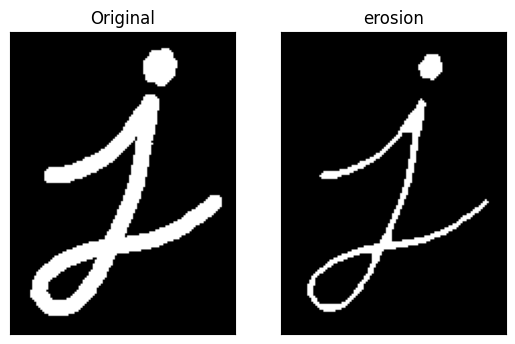

In [58]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/j.png',0)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

## 膨胀
1. 它与腐蚀正好相反。  
2. 图像中的白色区域或增加前景对象的大小  
3. 在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体  
4. 连接对象的损坏部分时也很有用。

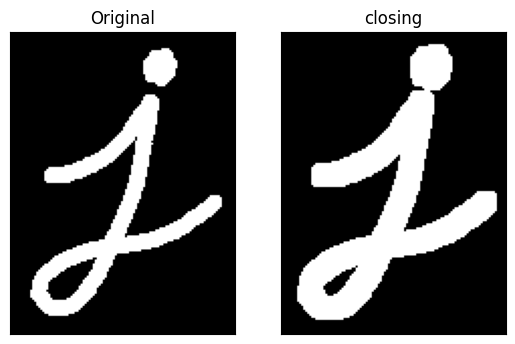

In [59]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../data/j.png',0)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1) 
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation,cmap='gray'),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

## 开运算
先腐蚀后膨胀

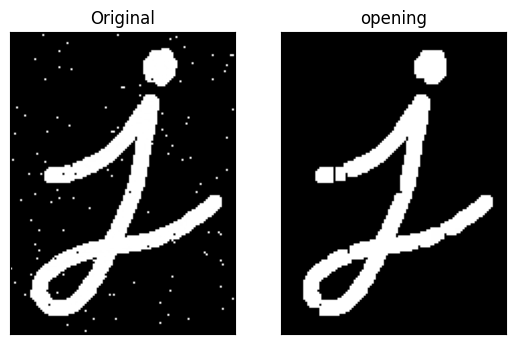

In [60]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.4)

kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap='gray'),plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

## 闭运算
先膨胀后腐蚀

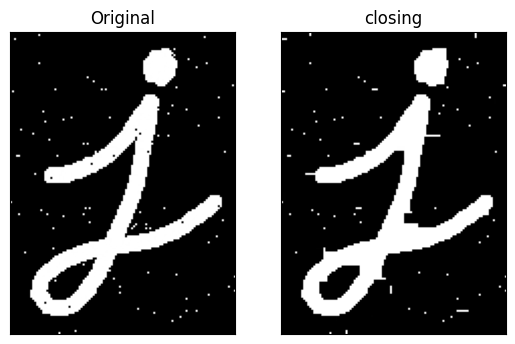

In [61]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.4)

kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) 

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing,cmap='gray'),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

展示以上效果集合

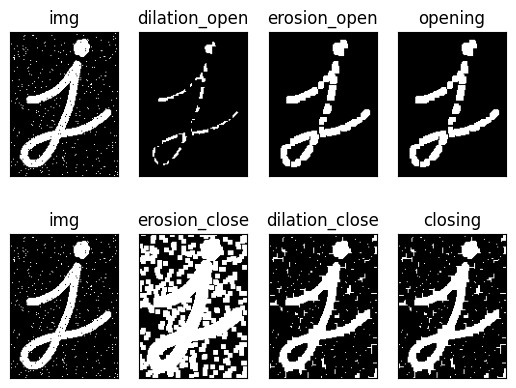

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.5)

kernel = np.ones((5,5),np.uint8)
#先腐蚀后膨胀 与开运算
erosion_close = cv.erode(img,kernel,iterations = 1)
dilation_close = cv.dilate(erosion_close,kernel,iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 

#先膨胀后腐蚀 与闭运算
dilation_open = cv.dilate(img,kernel,iterations = 1) 
erosion_open = cv.erode(dilation_open,kernel,iterations = 1)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) 

_tools.plot_image(241, img, "img",'gray')
_tools.plot_image(242, erosion_close, "dilation_open",'gray')
_tools.plot_image(243, dilation_close, "erosion_open",'gray')
_tools.plot_image(244, opening, "opening",'gray')

_tools.plot_image(245, img, "img",'gray')
_tools.plot_image(246, dilation_open, "erosion_close",'gray')
_tools.plot_image(247, erosion_open, "dilation_close",'gray')
_tools.plot_image(248, closing, "closing",'gray')
plt.show()

## 形态学梯度
将膨胀后的图像和腐蚀后的图像相减,结果将看起来像对象的轮廓

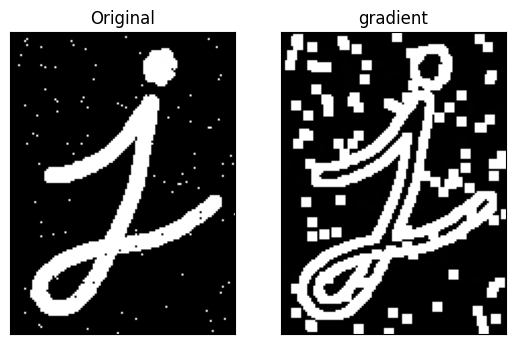

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.4)

kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) 

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gradient,cmap='gray'),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

## 顶帽
输入图像和图像开运算之差

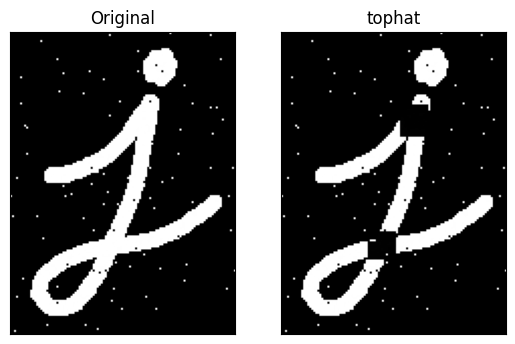

In [11]:
 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.4)

kernel = np.ones((9,9),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(tophat,cmap='gray'),plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

## 黑帽
输入图像和图像开运算之差

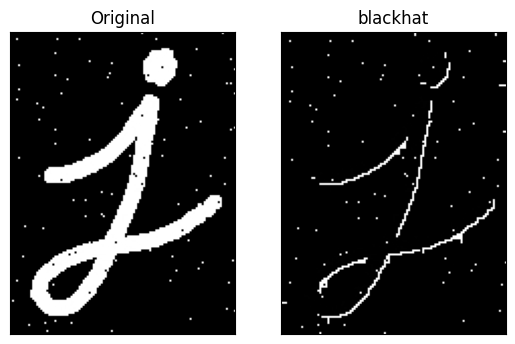

In [19]:
 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools

img = cv.imread('../data/j.png',0)
img = _tools.AddGaussNoise(img,0.4)

kernel = np.ones((4,4),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel) 

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blackhat,cmap='gray'),plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()